In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.signal as signal
import random
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model, Model
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import utils
import h5py
import time
from sklearn.preprocessing import MinMaxScaler

from numpy.random import seed
seed(5)
from tensorflow import set_random_seed
set_random_seed(7)
'''
Based on work by Federico De Guio: https://github.com/deguio/ML4DQM/blob/master/notebooks/Semi_Supervised/AE_ssl_random_hotdead_size.ipynb
See: https://indico.cern.ch/event/783825/contributions/3261553/attachments/1789464/2914642/hcaldpg_fpga_ml_reco_01feb2019.pdf
for possible implementation into FPGA
'''

'\nBased on work by Federico De Guio: https://github.com/deguio/ML4DQM/blob/master/notebooks/Semi_Supervised/AE_ssl_random_hotdead_size.ipynb\nSee: https://indico.cern.ch/event/783825/contributions/3261553/attachments/1789464/2914642/hcaldpg_fpga_ml_reco_01feb2019.pdf\nfor possible implementation into FPGA\n'

In [44]:
scint_decays=np.linspace(15,50,10)
ratios=np.linspace(-25,25,10)
eventsperexperiment=500
integration_vals=[1.25, 3.75, 6.25, 8.75, 11.25, 13.75, 16.25, 18.75, 21.25, 23.75, 26.25, 28.75, 31.25, 33.75, 36.25, 38.75, 41.25, 43.75, 46.25, 48.75, 51.25, 53.75, 56.25, 58.75, 61.25, 63.75, 66.25, 68.75, 71.25, 73.75, 76.25, 78.75, 81.25, 83.75, 86.25, 88.75, 91.25, 93.75, 96.25, 98.75, 101.25, 103.75, 106.25, 108.75, 111.25, 113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75, 131.25, 133.75, 136.25, 138.75, 141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25, 158.75, 161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75, 181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75, 201.25, 203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75, 221.25, 223.75, 226.25, 228.75, 231.25, 233.75, 236.25, 238.75, 241.25, 243.75, 246.25, 248.75]

In [ ]:
file=h5py.File('NarrowerParameterSpace500events5000photons100binsTestingLibrary.hdf5', 'r')
X=[]
Y=[]
labels=[]

for ratio in ratios:
    for scint_decay in scint_decays:
        tempX=[]
        tempY=[]
        templabels=[]
        for i in range(eventsperexperiment):
            label="/ratio"+str(ratio)+"scintdecay"+str(scint_decay)+"/ratio"+str(ratio)+"scintdecay"+str(scint_decay)+"event"+str(i)+"/ratio"+str(ratio)+"scintdecay"+str(scint_decay)+"event"+str(i)
            #print(label)
            Xdata=file[label+"input"][:]
            Ydata=file[label+"output"][:]
            Xdata=np.asarray(Xdata)
            #norm_factor=np.sum(Xdata)
            norm_factor=np.trapz(Xdata, integration_vals)
            Xdata_normalized=Xdata/norm_factor
            tempX.append(Xdata_normalized)
            #tempX.append(Xdata)
            tempY.append(Ydata)
            templabels.append(label)
        X.append(tempX)
        Y.append(tempY)
        labels.append(templabels)

file.close()
X=np.asarray(X)
Y=np.asarray(Y)

[0.03389772 0.9661024 ]


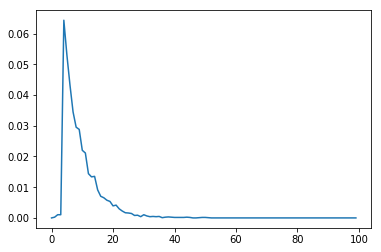

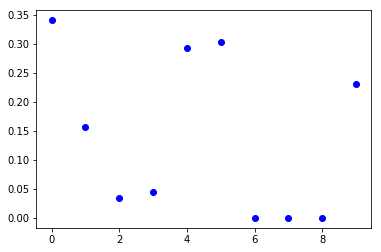

In [132]:
model=load_model('NarrowerParameterSpace500events10000photons100binsModel_20x20.hdf5')
layer_outputs = [layer.output for layer in model.layers[:]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

plt.plot(X[0][0])
one_input=X[0][0]
one_input=np.array([one_input])
activations = activation_model.predict(one_input)
plt.figure()
plt.plot(activations[0][0], 'bo')
print(activations[1][0])

In [50]:
file=h5py.File('NarrowerParameterSpace500events5000photons100binsTestingLibrary.hdf5', 'r')
X2=[]
Y2=[]
labels2=[]

for ratio in ratios:
    for scint_decay in scint_decays:
        tempX=[]
        tempY=[]
        templabels=[]
        for i in range(eventsperexperiment):
            label="/ratio"+str(ratio)+"scintdecay"+str(scint_decay)+"/ratio"+str(ratio)+"scintdecay"+str(scint_decay)+"event"+str(i)+"/ratio"+str(ratio)+"scintdecay"+str(scint_decay)+"event"+str(i)
            #print(label)
            Xdata=file[label+"input"][:]
            Ydata=file[label+"output"][:]
            Xdata=np.asarray(Xdata)
            norm_factor=np.sum(Xdata)
            Xdata_normalized=Xdata/norm_factor
            tempX.append(Xdata_normalized)
            #tempX.append(Xdata)
            tempY.append(Ydata)
            templabels.append(label)
        X2.append(tempX)
        Y2.append(tempY)
        labels2.append(templabels)

file.close()
X2=np.asarray(X2)
Y2=np.asarray(Y2)

[0.03361365 0.96493626]


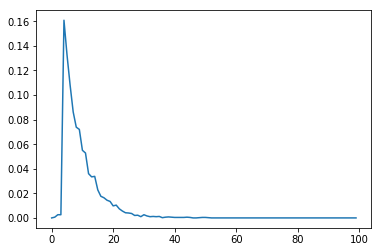

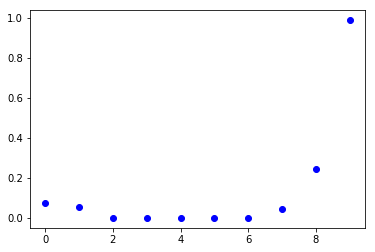

In [131]:
model=load_model('NarrowerParameterSpace500events10000photons100binsModel_20x20_normalized_bytotal.hdf5')
layer_outputs = [layer.output for layer in model.layers[:]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

plt.plot(X2[0][0])
one_input=X2[0][0]
one_input=np.array([one_input])
activations = activation_model.predict(one_input)
plt.figure()
plt.plot(activations[0][0], 'bo')
print(activations[1][0])

In [54]:
file=h5py.File('NarrowerParameterSpace500events5000photons100binsTestingLibrary.hdf5', 'r')
X3=[]
Y3=[]
labels3=[]

for ratio in ratios:
    for scint_decay in scint_decays:
        tempX=[]
        tempY=[]
        templabels=[]
        for i in range(eventsperexperiment):
            label="/ratio"+str(ratio)+"scintdecay"+str(scint_decay)+"/ratio"+str(ratio)+"scintdecay"+str(scint_decay)+"event"+str(i)+"/ratio"+str(ratio)+"scintdecay"+str(scint_decay)+"event"+str(i)
            #print(label)
            Xdata=file[label+"input"][:]
            Ydata=file[label+"output"][:]
            norm_factor=max(Xdata)
            Xdata=np.asarray(Xdata)
            Xdata_normalized=Xdata/norm_factor
            tempX.append(Xdata_normalized)
            #tempX.append(Xdata)
            tempY.append(Ydata)
            templabels.append(label)
        X3.append(tempX)
        Y3.append(tempY)
        labels3.append(templabels)

file.close()
X3=np.asarray(X3)
Y3=np.asarray(Y3)

[0.        0.9758417]


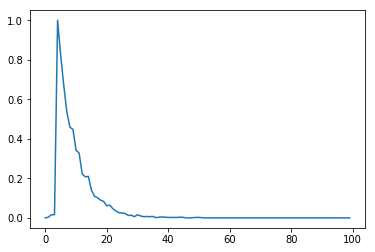

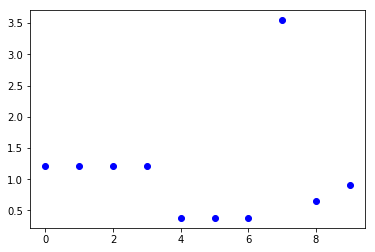

In [130]:
model=load_model('NarrowerParameterSpace500events10000photons100binsModel_20x20_normalized_max.hdf5')
layer_outputs = [layer.output for layer in model.layers[:]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

plt.plot(X3[0][0])
one_input=X3[0][0]
one_input=np.array([one_input])
activations = activation_model.predict(one_input)
plt.figure()
plt.plot(activations[0][0], 'bo')
print(activations[1][0])

[-0.32142004 -0.3708767  -0.3153396  -0.3516706  -0.3163595  -0.33553398
 -0.31215665 -0.3138669  -0.08266699  0.06858827]
[0.04480816 0.95519185]


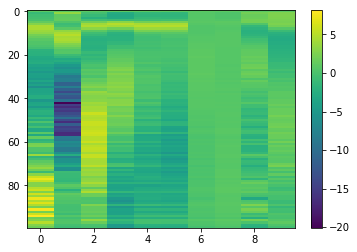

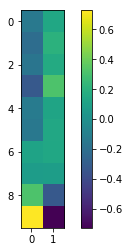

In [129]:
model=load_model('NarrowerParameterSpace500events10000photons100binsModel_20x20.hdf5')

weights=[]
for layer in model.layers:
    weight=layer.get_weights()
    weights.append(weight)
plt.imshow(weights[0][0], aspect='auto')
plt.colorbar()
print(weights[0][1])
plt.figure()
plt.imshow(weights[1][0])
plt.colorbar()
print(weights[1][1])

[-0.35069603 -0.38090944 -0.4370444  -0.4370444  -0.52643913 -0.5244423
 -0.5244423  -0.39174363 -0.5972353  -0.20368525]
[-0.00183958 -0.04402029]


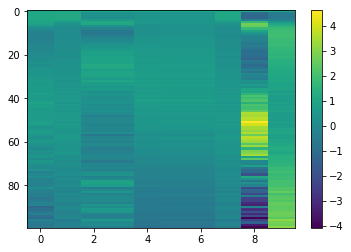

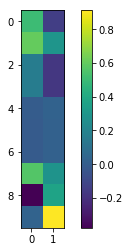

In [127]:
model=load_model('NarrowerParameterSpace500events10000photons100binsModel_20x20_normalized_bytotal.hdf5')
weights=[]
for layer in model.layers:
    weight=layer.get_weights()
    weights.append(weight)
plt.imshow(weights[0][0], aspect='auto')
plt.colorbar()
print(weights[0][1])
plt.figure()
plt.imshow(weights[1][0])
plt.colorbar()
print(weights[1][1])

[-0.92211103 -0.922111   -0.922111   -0.922111   -0.7161005  -0.7161005
 -0.7161005  -0.54124475 -0.5861053  -0.5663683 ]
[-1.7792888  0.0469823]


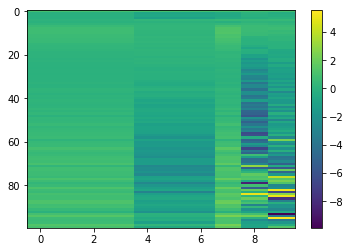

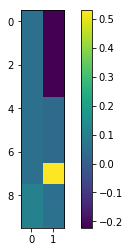

In [128]:
model=load_model('NarrowerParameterSpace500events10000photons100binsModel_20x20_normalized_max.hdf5')
weights=[]
for layer in model.layers:
    weight=layer.get_weights()
    weights.append(weight)
plt.imshow(weights[0][0], aspect='auto')
plt.colorbar()
print(weights[0][1])
plt.figure()
plt.imshow(weights[1][0])
plt.colorbar()
print(weights[1][1])